# Problem 1

In [2]:
import numpy as np
from scipy import stats
import math
import statistics
import os
import sys

In [3]:
marks = np.asarray([6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8])

In [5]:
def stats(marks):   
    print(f"The mean of the marks is {np.mean(marks)}")
    print(f"The median of the marks is {np.median(marks)}")
    print(f"The mode of the marks is {statistics.mode(marks)}")
    print(f"The standard Deviation of the marks is {np.std(marks)}")
    
stats(marks)

The mean of the marks is 6.85
The median of the marks is 7.0
The mode of the marks is 7
The standard Deviation of the marks is 1.5898113095584647


# Problem 2

In [6]:
call_records =np.asarray([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109])

In [7]:
stats(call_records)

The mean of the marks is 107.51428571428572
The median of the marks is 100.0
The mode of the marks is 75
The standard Deviation of the marks is 38.77287080168403


# Problem 3

In [8]:
x = np.asarray([0,1,2,3,4,5])
f_x = np.array([0.09,0.15,0.40,0.25,0.10,0.01])

In [9]:
x.reshape((1,-1))
f_x.reshape((-1,1))
mean=np.dot(x,f_x)
variance_of_x=(x-mean)**2
variance = np.dot(variance_of_x.reshape(1,-1),f_x)
print(f"Mean no. of workouts: {mean}")
print(f"Variance of workouts: {variance}")

Mean no. of workouts: 2.15
Variance of workouts: [1.2275]


# Problem 4

In [10]:
from scipy import integrate

In [11]:
#PDF (𝑑) = 20𝑒−20(𝑑−12.5)
#𝑑 ≥ 12.5
PDF=lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x=integrate.quad(PDF,12.6,np.inf)
y = 11
CDF=integrate.quad(PDF,-np.inf,y)
print(f"Proportion of Parts need to scrapped when d >12.6mm is :{P_x[0]}")
print(f"CDF when d= 11mm is:{CDF[0]}")
print(f"Proportion of CDF when d>12.5mm is : {integrate.quad(PDF,12.5,np.inf)[0]}")

#Conclusion
#it can be concluded that the function is only valid when d>=12.5. 
#When d<12.5, the part can be reworked to 12.5 so no scrap in this case.
#PDF is not defined for d=11

Proportion of Parts need to scrapped when d >12.6mm is :0.13533528323661398
CDF when d= 11mm is:inf
Proportion of CDF when d>12.5mm is : 1.0000000000000024


<ipython-input-11-5ed2f695cae4>:3: RuntimeWarning: overflow encountered in exp
  PDF=lambda d:20*(np.exp((-20*(d-12.5))))


# Problem 5

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import scipy.special

a      2.000000
B_a    0.324135
Name: 2, dtype: float64


Text(0, 0.5, 'Probability of Fault')

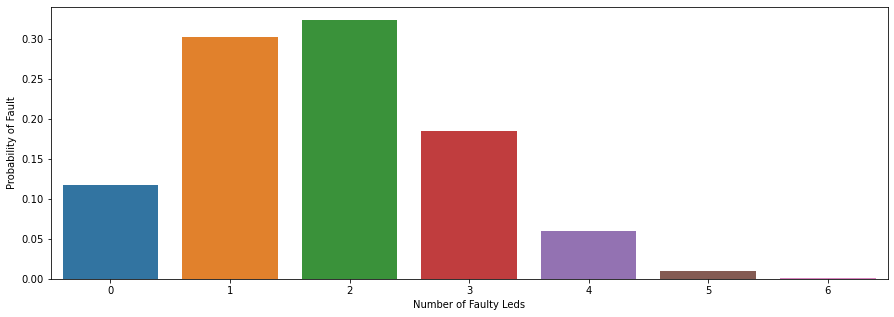

In [13]:
#x = faulty = 0.3
#y = not faulty = 0.7
x = 0.3
y = 0.7
df=pd.DataFrame({'a':[int(i) for i in range(7)],
                 'B_a':[scipy.special.comb(6,i)*(x**i)*(y**(6-i)) for i in range(7)]})
print(df.iloc[2])
plt.figure(figsize=(15,5))
sns.barplot('a','B_a',data=df)
plt.xlabel('Number of Faulty Leds')
plt.ylabel('Probability of Fault')

In [14]:
df['Expected value']=df['a']*df['B_a']
mean=np.round(df['Expected value'].sum())
print('mean = {}'.format(mean))
df['variance']=df['B_a']*(df['a']-mean)**2
std=np.sqrt(df['variance'].sum())
print(f"Standard Deviation : {np.round(std)}")

mean = 2.0
Standard Deviation : 1.0


# Problem 6

In [15]:
#Gaurav- avg=,p1=0.75
#Barakha- avg=5,p2=0.45
#here both the students are independent from each other, correction rate of one doesnot effect another one 
#G(5)*B(5)

from scipy.stats import binom
import numpy as np

print(f"Probability of each of them solving 5 questions correctly is:{binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)}")
print(f"Probability of each of them solving 4,6 questions correctly is:{binom.pmf(4,8,0.75)*binom.pmf(6,12,0.45)}")
#their correction rates effect their combined probability

Probability of each of them solving 5 questions correctly is:0.04619989057299213
Probability of each of them solving 4,6 questions correctly is:0.018374956477894576


In [16]:
#following graphs show their correction rates invidually and combined
def binom_plot(n,p,):
    fig,ax=plt.subplots(1,1)
    x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

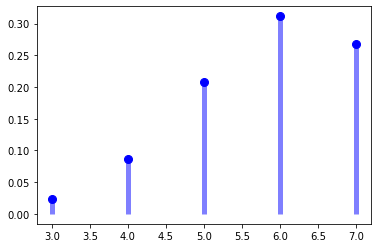

In [17]:

#Gaurav
binom_plot(8,0.75)

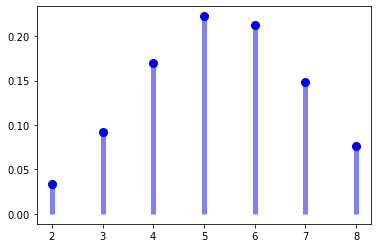

In [18]:
#Barakha
binom_plot(12,0.45)

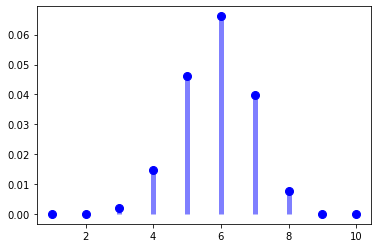

In [19]:
fig,ax=plt.subplots(1,1)
x = np.arange(1,11)
ax.plot(x, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), colors='b', lw=5, alpha=0.5)
#maximum combined probability observed at 6 question

In [20]:
from scipy.stats import binom
binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)

0.04619989057299213

# Problem 7

In [21]:
from scipy.stats import poisson
#We need to calculate average number of customers arriving per 4 minutes
#72/60 customers come per minute
mu = 4*(72/60) #customers come per 4 minutes
print(f"The probability of arriving 5 cutomers in 4 minutes is : {poisson.pmf(k=5,mu=mu)}")
print(f"The probability of arriving not more than 3 customers in 4 minutes is : {poisson.pmf(k=3, mu=mu)}")
print(f'The Probability of more than 3 customers arriving in 4 minutes is : {1-poisson.cdf(k=3,mu=mu)}')

The probability of arriving 5 cutomers in 4 minutes is : 0.17474768364388296
The probability of arriving not more than 3 customers in 4 minutes is : 0.15169069760753714
The Probability of more than 3 customers arriving in 4 minutes is : 0.7057700835034357


Text(0, 0.5, 'Probability')

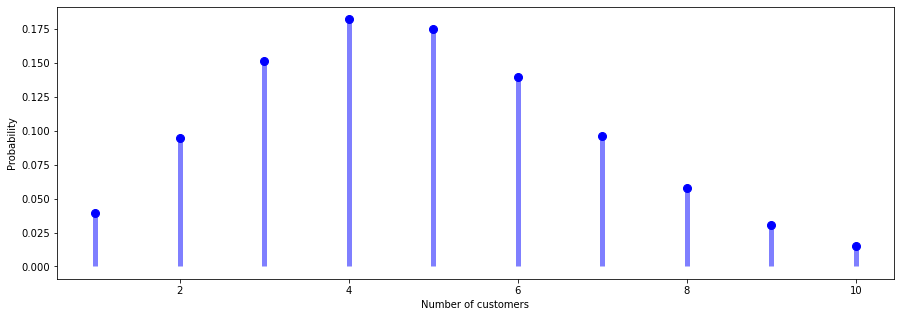

In [22]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x, poisson.pmf(x,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of customers')
plt.ylabel('Probability')

# Problem 8

The pobability of commiting 2 errors in 455 words financial report is :0.09669027375144444
The pobability of commiting 2 errors in 1000 words financial report is :0.23012815007300153
The pobability of commiting 2 errors in 255 words financial report is :0.039377135392854104


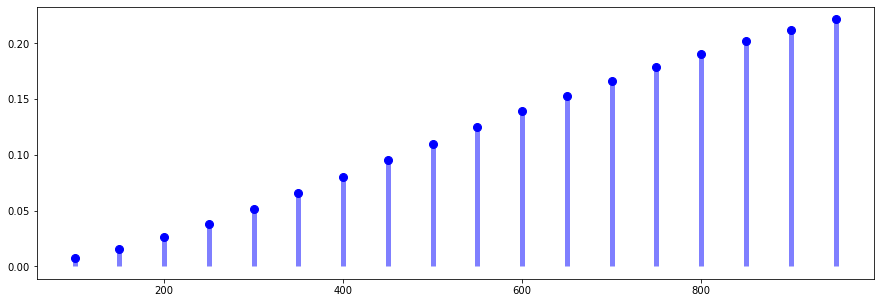

In [23]:
from scipy.stats import poisson
#Rate of entering=77 per minute
#error rate= 6/hour=0.1 per minute
#No of errors per word=0.1/77
unit_mu=0.1/77
def mu(n):
    return n * unit_mu
print(f"The pobability of commiting 2 errors in 455 words financial report is :{poisson.pmf(2,mu=mu(455))}")
print(f"The pobability of commiting 2 errors in 1000 words financial report is :{poisson.pmf(2,mu=mu(1000))}")
print(f"The pobability of commiting 2 errors in 255 words financial report is :{poisson.pmf(2,mu=mu(255))}")
x=range(100,1000,50)
mu=[i*unit_mu for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='b', lw=5, alpha=0.5)
#As the number of words increase probability of getting errors increases

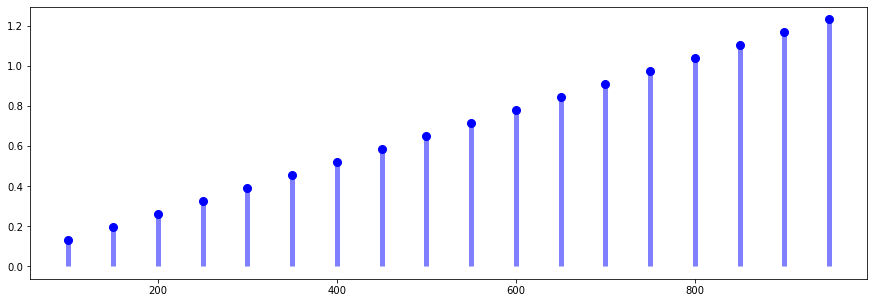

In [24]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,mu, 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0,mu, colors='b', lw=5, alpha=0.5)
#Value of mu keeps on increasing with number of words

# Problem 9 and 4 are same

# Problem 10

In [25]:
from scipy.stats import norm
def P(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]

print('P(Z>1.26) = %.5f'%(1-P(1.26)))
print('P(Z<-0.86) = %.5f'%P(-0.86))
print('P(Z>-1.37) = %.5f'%(1-P(-1.37)))
print('P(−1.25 < Z < 0.37) = %.5f'%P(0.37,b=-1.25))
print('P(Z ≤ −4.6) = %.5f'%P(-4.6))

P(Z>1.26) = 0.10383
P(Z<-0.86) = 0.19489
P(Z>-1.37) = 0.91466
P(−1.25 < Z < 0.37) = 0.53866
P(Z ≤ −4.6) = 0.00000


In [26]:
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


# Problem 11

In [27]:
mean = 10
std = np.sqrt(4)

def I(z, b=-np.inf):
    z = (z-mean)/std
    return integrate.quad(norm.pdf,b,z)[0]
print(f"Probability that current > 13mA is: {1-I(13)}")
print(f"Probability that current is between 9 mA and 11 mA is : {1-I(11,b=9)}")

Probability that current > 13mA is: 0.06680720126885797
Probability that current is between 9 mA and 11 mA is : 1.3085375387259144


# Problem 12

In [28]:
mean_dia=0.2508
std_dia=0.0005
#specified dia in the range of 0.2485<d<0.2515
#case-1 if mean_dia=0.2508
def I(mean,std,a,b) :
  #gives P(Z<=x)
  a=(a-mean)/std
  b=(b-mean)/std
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2508,I(0.2508,0.0005,0.2485,0.2515)}")
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2500,I(0.2500,0.0005,0.2485,0.2515)}")

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.2508, None)
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.25, None)


In [30]:
#Within the range of 0.2485<d<0.2515 A manufacturing process with mean of 0.25 gives maximum proportion of required shafts, there by reducing amount of scrap and reprocessing time.
#When compared to any other manufacturing process whose mean deviates from that of 0.25 less proportion of required shafts are obtained. The more the manufucaturing process deviaties from 0.25, lesser will be the proportion of reqired safts obtained¶
#Mathematically, in a given range 0.2485<d<0.2515 , if there are two noraml distributrions (manufacturing processes) with same standard deviation,more area will be covered by the distribution whose mean is closer to mean of the interval i.e 0.25